In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
df.isna().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [15]:
df[df.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [13]:
df.CustomerID.unique().shape

(4373,)

In [23]:
df[df.InvoiceNo.str.startswith('C', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [34]:
df1 = df.groupby(['CustomerID','InvoiceNo'], as_index=False).agg({'Quantity':'sum','InvoiceDate':'max'})
df1

,CustomerID,InvoiceNo,Quantity,InvoiceDate
0,12346.0,541431,74215,2011-01-18 10:01:00
1,12346.0,C541433,-74215,2011-01-18 10:17:00
2,12347.0,537626,319,2010-12-07 14:57:00
3,12347.0,542237,315,2011-01-26 14:30:00
4,12347.0,549222,483,2011-04-07 10:43:00
...,...,...,...,...
22185,18283.0,579673,134,2011-11-30 12:59:00
22186,18283.0,580872,142,2011-12-06 12:02:00
22187,18287.0,554065,488,2011-05-22 10:39:00
22188,18287.0,570715,990,2011-10-12 10:23:00


**Calculating for Recency**

In [35]:
#set cut off date as maximum date plus a day
cut_off_date = df1.InvoiceDate.max() + pd.DateOffset(n=1)
cut_off_date = cut_off_date.normalize()
cut_off_date

Timestamp('2011-12-10 00:00:00')

In [37]:
r = df1.groupby('CustomerID', as_index=False).agg({'InvoiceDate': 'max'})
r.head()

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [38]:
#cut off date minus the last date customer made transaction
r['recency'] =  cut_off_date -  r['InvoiceDate'] 
r.head(2)

,CustomerID,InvoiceDate,recency
0,12346.0,2011-01-18 10:17:00,325 days 13:43:00
1,12347.0,2011-12-07 15:52:00,2 days 08:08:00


In [39]:
#rounding the number of days interval to integer
r['recency'] = r.recency.dt.round(freq='d').dt.days
r.head(2)

,CustomerID,InvoiceDate,recency
0,12346.0,2011-01-18 10:17:00,326
1,12347.0,2011-12-07 15:52:00,2


In [61]:
r.shape

(4372, 3)

In [91]:
#drop InvoiceDate column 
#r.drop(['InvoiceDate'], axis=1,inplace=True)
r.head()

,CustomerID,recency
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310


**calculating for frequency and monetary value**

In [58]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [69]:
df[df.InvoiceNo.str.startswith('C', na=True )].shape

(541906, 9)

In [70]:
df[df.InvoiceNo.str.startswith('C', na=False )].shape

(9288, 9)

In [73]:
df['Amount'] = df['Quantity'] * df['UnitPrice']

In [79]:
fm = df.groupby(['CustomerID'], as_index=False).agg({'InvoiceNo':'count','Amount':'sum'})
fm.head()

,CustomerID,InvoiceNo,Amount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


In [81]:
fm.shape

(4372, 3)

In [92]:
fm = fm.rename(columns = {
    'InvoiceNo':'frequency',
    'Amount' : 'Monetary'
})

In [93]:
fm.head()

,CustomerID,frequency,Monetary
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


In [77]:
df[df.CustomerID == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


**RFM table**

In [97]:
RFM = r.merge(fm, on='CustomerID', how='inner')
RFM.head()

,CustomerID,recency,frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [99]:
RFM.set_index(['CustomerID']).head()

,recency,frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


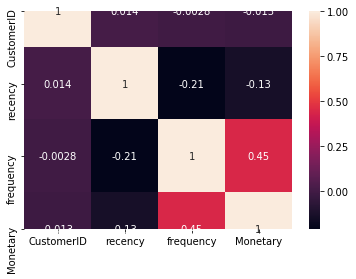

In [125]:
#finding the correlation in RFM
sns.heatmap(RFM.corr(),annot=True)

**Clustering RFM table**

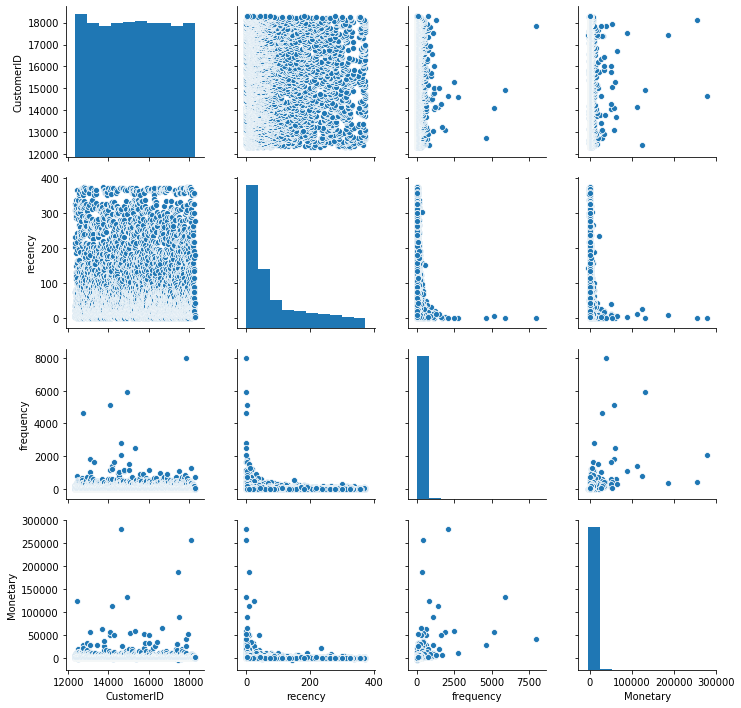

In [106]:
sns.pairplot(RFM)

In [114]:
from sklearn.cluster import KMeans

In [121]:
k_range = range(1,11)
SSE = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(RFM)
    SSE.append(km.inertia_)

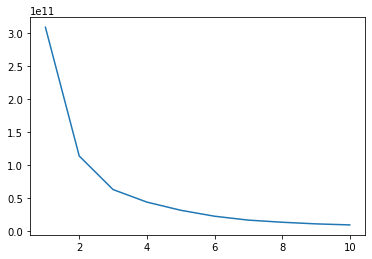

In [122]:
plt.plot(k_range,SSE)

In [126]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [130]:
rfm_predict = km.fit_predict(RFM)
rfm_predict

array([0, 0, 0, ..., 0, 0, 0])

In [155]:
RFM['cluster'] = rfm_predict
RFM.sample(10)

,CustomerID,recency,frequency,Monetary,cluster
560,13077.0,1,112,729.27,0
701,13267.0,3,224,4404.44,0
1185,13938.0,35,7,71.66,0
1450,14301.0,108,16,632.04,0
3770,17463.0,16,219,1881.36,0
3490,17070.0,114,64,312.14,0
4107,17925.0,373,1,244.08,0
4050,17854.0,185,15,311.26,0
552,13065.0,373,14,205.86,0
30,12381.0,4,91,1803.96,0


In [150]:
RFM['cluster'].unique()

array([0, 2, 1], dtype=int64)